In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime,timedelta

order=[]
order = pd.read_csv('order.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
### how riskified is doing?
order.is_potential_fraud.value_counts()

False    105808
True       3483
Name: is_potential_fraud, dtype: int64

In [3]:
myTable = []
myTable = order[(order.product_status!='pending')&(order.product_status!='completed')] ### only 4 instances
myTable = myTable.reset_index(drop=True)
print myTable.shape
print order.shape

(109287, 45)
(109291, 45)


In [4]:
myTable['fraud'] = pd.DataFrame(1,index=myTable.index,columns=['fraud'])
myTable.fraud[(myTable.is_potential_fraud) | (myTable.status=='fraudulent')] = 0
len(myTable) - myTable['fraud'].sum()
### some facts
(myTable.status=='fraudulent').groupby(myTable.is_potential_fraud).value_counts()
(myTable.is_potential_fraud).groupby(myTable.status=='fraudulent').value_counts()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


status  is_potential_fraud
False   False                 105455
        True                    1680
True    True                    1803
        False                    349
Name: is_potential_fraud, dtype: int64

In [5]:
myTable['device']=myTable.groupby(['device_identifier'])['device_identifier'].transform('count')

In [6]:
twitter=[]
twitter = pd.DataFrame(0, index=myTable.index, columns = ['twitter'])
twitter[pd.isnull(myTable.twitter_access_token)]=1

instagram=[]
instagram = pd.DataFrame(0, index=myTable.index, columns = ['instagram'])
instagram[pd.isnull(myTable.instagram_access_token)]=1

social=[]
social = pd.DataFrame(twitter.twitter+instagram.instagram, index=myTable.index, columns = ['social'])

In [7]:
dele=[]
dele = pd.to_datetime(myTable['updated_at'])- pd.to_datetime(myTable['created_at'])
deltaU = dele.dt.total_seconds()/(60000.0)
deltaUU = []
deltaUU = pd.DataFrame(deltaU,index=myTable.index,columns=['timestamp'])
deltaUU[deltaUU<0]=0

dele=[]
dele = pd.to_datetime(myTable['first_purchase_at'])- pd.to_datetime(myTable['created_at'])
deltaT = dele.dt.total_seconds()/(60000.0)
deltaTT = []
deltaTT = pd.DataFrame(deltaT,index=myTable.index,columns=['timestamp_buyer'])
deltaTT = deltaTT.fillna(deltaTT.max())
deltaTT[deltaTT<0]=0

dele=[]
dele = pd.to_datetime(myTable['first_sale_at'])- pd.to_datetime(myTable['created_at'])
deltaS = dele.dt.total_seconds()/(60000.0)
deltaSS = []
deltaSS = pd.DataFrame(deltaS,index=myTable.index,columns=['timestamp_seller'])
deltaSS = deltaSS.fillna(deltaSS.max())
deltaSS[deltaSS<0]=0

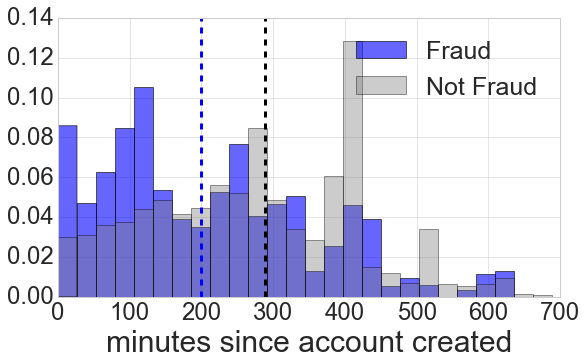

In [8]:
import seaborn.apionly as sns
#import seaborn as sns 
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))

myTable['deltaUU'] = deltaUU
bins = np.histogram(myTable['deltaUU'], bins=30)[1] #get the bin edges

weigh1 = np.ones_like(myTable.deltaUU[myTable.fraud==0])/float(len(myTable.deltaUU[myTable.fraud==0]))
weigh2 = np.ones_like(myTable.deltaUU[myTable.fraud==1])/float(len(myTable.deltaUU[myTable.fraud==1]))

plt.hist(myTable['deltaUU'][myTable.fraud==0],weights=weigh1,alpha=0.6,label="Fraud",bins=bins,color='blue')
plt.hist(myTable['deltaUU'][myTable.fraud==1],weights=weigh2,alpha=0.4,label="Not Fraud", bins=bins, color='gray')
plt.axvline((myTable['deltaUU'][myTable.fraud==0]).median(),color='b', linestyle='dashed', linewidth=3)
plt.axvline((myTable['deltaUU'][myTable.fraud==1]).median(),color='k', linestyle='dashed', linewidth=3)
plt.legend()
plt.xlabel('minutes since account created',size=30)
axes = plt.gca()
axes.set_xlim([0,700])
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
axes.legend(loc = 'upper right',prop={'size':25})
sns.set_style('darkgrid')
plt.show()

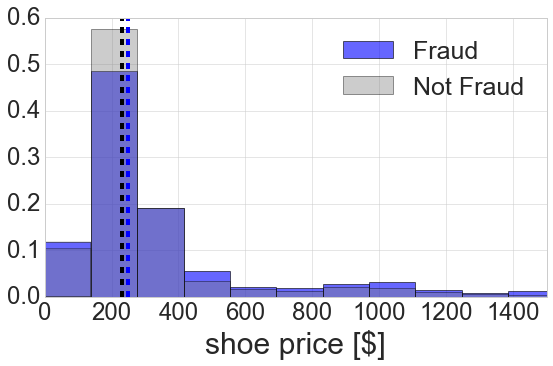

In [9]:
import seaborn.apionly as sns
#import seaborn as sns 
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))

myTable['price'] = myTable.price_cents/100.0
#myTable['price'][myTable.price<0]=0

weig1 = np.ones_like(myTable.price[myTable.fraud==0])/float(len(myTable.price[myTable.fraud==0]))
weig2 = np.ones_like(myTable.price[myTable.fraud==1])/float(len(myTable.price[myTable.fraud==1]))

cm = plt.cm.get_cmap('RdYlBu_r')
bins=np.histogram(myTable.price, bins=40)[1] #get the bin edges
plt.hist(myTable.price[myTable.fraud==0],weights = weig1,
         alpha=0.6,label="Fraud",bins=bins,color='blue')
plt.hist(myTable.price[myTable.fraud==1], weights = weig2, 
         alpha=0.4,label="Not Fraud", bins=bins, color='gray')
plt.axvline((myTable.price[myTable.fraud==0]).median(),color='b', linestyle='dashed', linewidth=4)
plt.axvline((myTable.price[myTable.fraud==1]).median(),color='k', linestyle='dashed', linewidth=4)

plt.legend()
plt.xlabel('shoe price [$]',size=30)
axes = plt.gca()
axes.set_xlim([0,1500])
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
axes.legend(loc = 'upper right',prop={'size':25})
sns.set_style('darkgrid')
plt.show()

In [10]:
myTable['account_det']=myTable.groupby(['account_details'])['account_details'].transform('count')
myTable['account_det'] = myTable['account_det'].fillna(0)

In [11]:
myTable.want_count = myTable.want_count.fillna(1.5)
myTable.own_count = myTable.own_count.fillna(1.5)

In [12]:
ip = pd.DataFrame(0,index=myTable.index,columns=['IP'])
ip[myTable.current_sign_in_ip==myTable.last_sign_in_ip]=1
ip[myTable.current_sign_in_ip==myTable.current_ip]=1
ip[myTable.last_sign_in_ip==myTable.current_ip]=1
ip[pd.isnull(myTable.current_ip) & pd.isnull(myTable.current_sign_in_ip)]=2

In [13]:
myTable['zipcode_bill'] = myTable['zipcode_bill'].fillna('00000')
myTable['postal_code'] = myTable['postal_code'].fillna('00000')
myTable['postal_code_part'] = myTable['postal_code'].apply(lambda x: x[0:5])
myTable['zipcode'] = pd.DataFrame(1, index=myTable.index, columns=['zip'])
myTable['zipcode'][myTable['zipcode_bill'] == myTable['postal_code_part']]=0
myTable['zipcode'][(myTable['zipcode_bill'] == '00000') | (myTable['postal_code_part']== '00000')]=2

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
myTable.zipcode.value_counts()

2    69340
0    24640
1    15307
Name: zipcode, dtype: int64

In [15]:
data=[]
data = pd.concat([myTable['points'], myTable['seller_score'],myTable['want_count'], 
                  myTable.template_selling_count, social,instagram,myTable['own_count'],
                  myTable['account_det'], ip, myTable['zipcode'], deltaUU,
                  myTable['device'], myTable['sign_in_count'],myTable['product_id'],
                  myTable.fraud],axis=1)

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

train, test = train_test_split(data,random_state=500,test_size=0.25)
features_train = train.ix[:, train.columns!='fraud']
labels_train = train.fraud
features_test = test.ix[:, test.columns!='fraud']
labels_test = test.fraud

clf_RF = RandomForestClassifier(class_weight='balanced',random_state=5000, oob_score=True)
                               
clf_RF.fit(features_train,labels_train)
print clf_RF.oob_score_

0.975867748429


//anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [17]:
from sklearn import metrics

prediction = clf_RF.predict_proba(features_test)
pred = prediction[:,1]>0.71
### optimal threshold
print(roc_auc_score(labels_test,pred))
print(metrics.classification_report(labels_test,pred))
print confusion_matrix(labels_test,pred)  

importances = clf_RF.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
X = features_train
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s"%(X.columns.values[indices[f]]), importances[indices[f]])

0.932506743082
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       995
          1       1.00      0.99      0.99     26327

avg / total       0.99      0.99      0.99     27322

[[  867   128]
 [  167 26160]]
Feature ranking:
('timestamp', 0.15863227367210128)
('own_count', 0.14576511525921276)
('product_id', 0.14174295771013912)
('device', 0.097820389919846484)
('want_count', 0.095604027660015772)
('template_selling_count', 0.088340352570970809)
('sign_in_count', 0.07073951042860141)
('zipcode', 0.070556538994618029)
('points', 0.042984031223742981)
('account_det', 0.024322799870604477)
('seller_score', 0.022076890423958443)
('IP', 0.017424068169305203)
('social', 0.01398755378010239)
('instagram', 0.010003490316780776)


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


(array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18]),
 <a list of 10 Text yticklabel objects>)

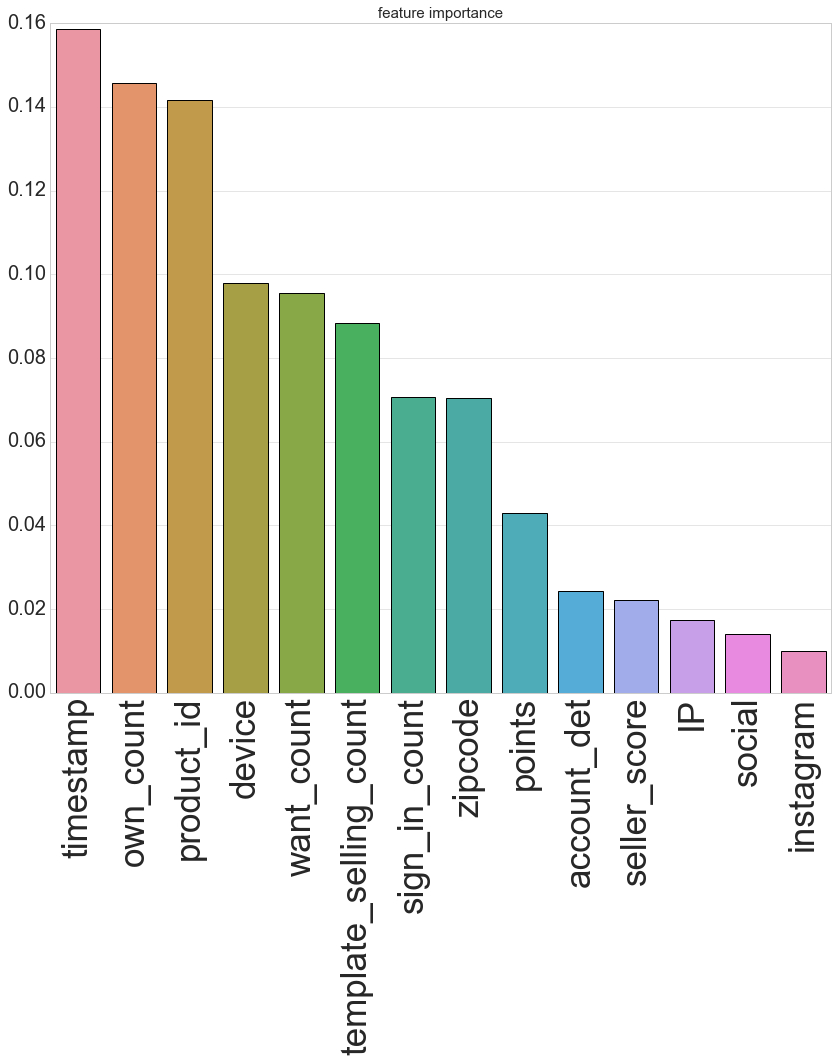

In [21]:
#### plot feature importance

%matplotlib inline
import seaborn.apionly as sns
import seaborn as sns 

num = data.shape[1]
num=14

ind = [i * 1. for i in range(0, num )] 
sns.set_style("whitegrid")
plt.figure(figsize=(14,12))
sns.barplot(ind,importances[indices[:num]])
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
print ind
plt.xticks(ind,X.columns.values[indices[:num]],fontsize=35)
plt.title("feature importance", fontsize=15)
plt.yticks(fontsize=20)

0.965168990774


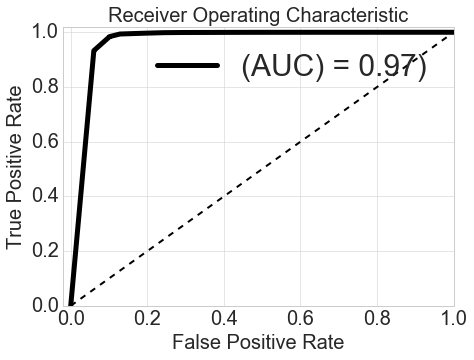

In [20]:
fpr, tpr,_ = roc_curve(labels_test, prediction[:,1])
roc_auc = auc(fpr, tpr)
print roc_auc

%matplotlib inline
import seaborn.apionly as sns
#import seaborn as sns 
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
plt.title('Receiver Operating Characteristic',size=20)
plt.plot(fpr, tpr, lw=5, color='k', label='(AUC) = %0.2f)' % roc_auc)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc = 'bottom right',prop={'size':30})
plt.plot([0, 1], [0, 1],'k--', linewidth=2)
plt.xlim([-0.02, 1.])
plt.ylim([-0.0, 1.02])
plt.ylabel('True Positive Rate',size=20)
plt.xlabel('False Positive Rate',size=20)
sns.set_style('darkgrid')
#sns.set_style("ticks", {"xtick.major.size": 18, "ytick.major.size": 18})
plt.show()